In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# EXTRACT: Load the Iris dataset from seaborn

In [9]:
df = sns.load_dataset('iris') 

# TRANSFORM: Clean, Engineer Features, Normalize, Encode

In [10]:
# Drop missing values (if any)
df = df.dropna()

# Create new feature: sepal_area
df['sepal_area'] = df['sepal_length'] * df['sepal_width']

# Binning petal_length into categories
df['petal_length_category'] = pd.cut(df['petal_length'], bins=[0, 2, 5, 7], labels=['Short', 'Medium', 'Long'])

# Normalize numeric columns using MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# One-hot encode the 'species' column
df_encoded = pd.get_dummies(df, columns=['species'], drop_first=True)

# LOAD: Save transformed data

In [11]:
df_encoded.to_csv('transformed_iris.csv', index=False)

# VISUALIZE: Visualize transformed data

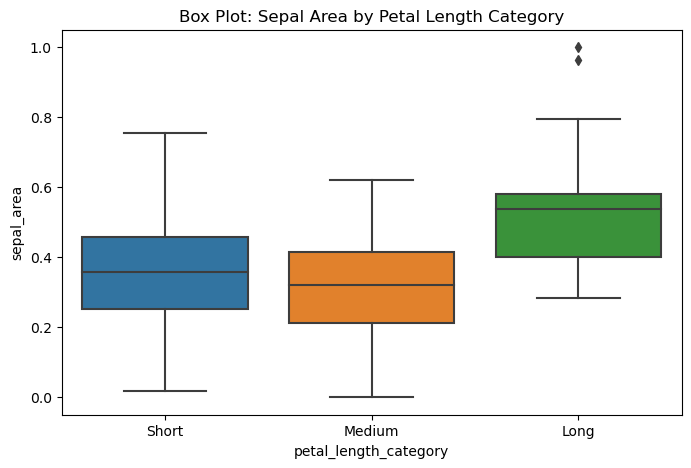

C:\Users\91862\AppData\Local\Temp\ipykernel_30760\28780193.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')


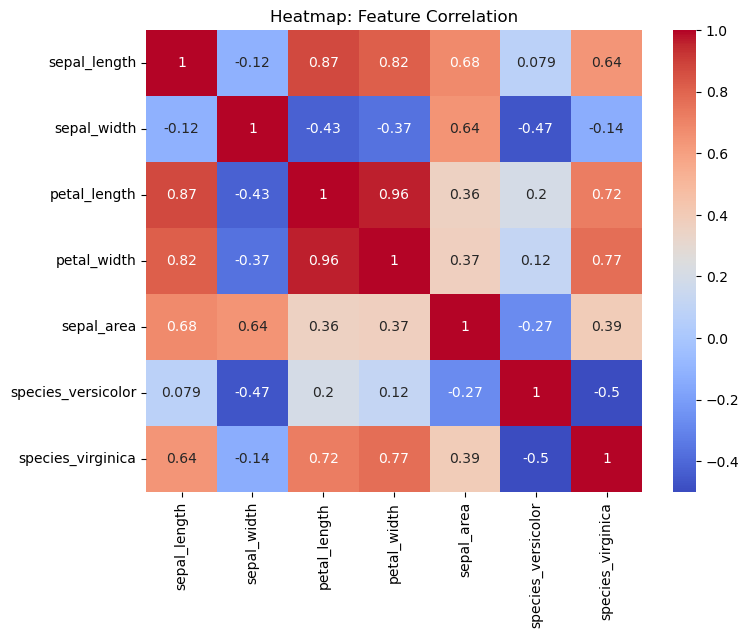

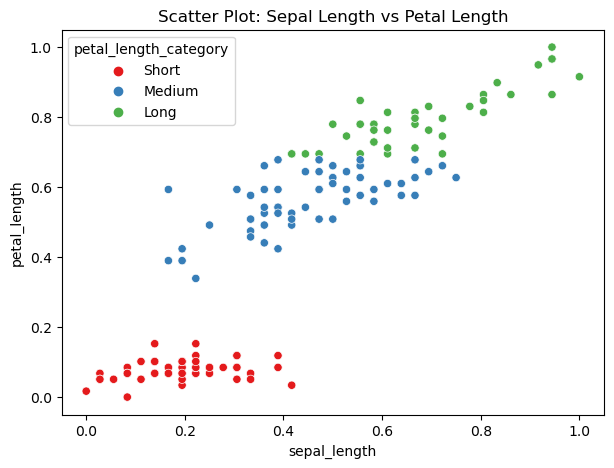

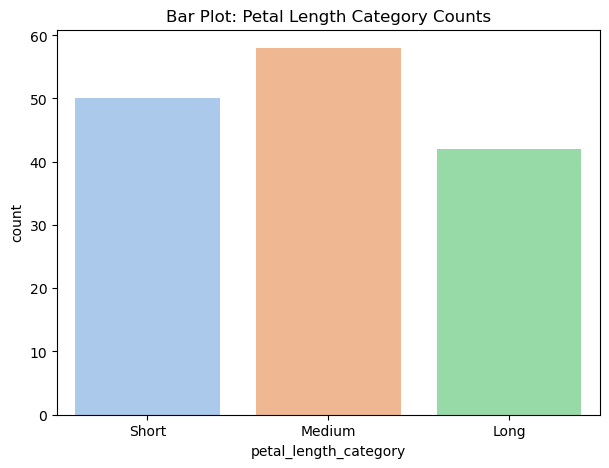

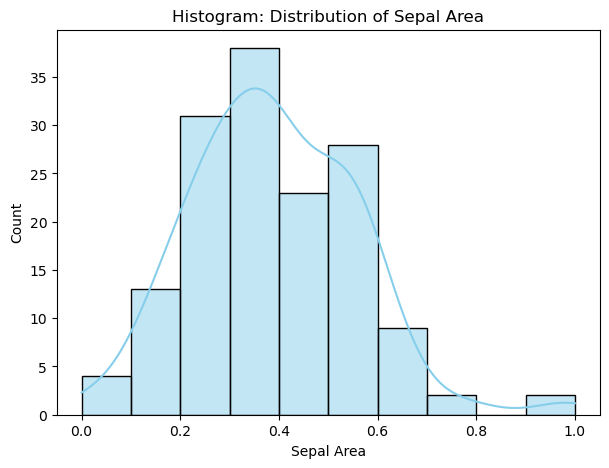

In [12]:
#1. Box Plot: Sepal Area by Petal Length Category
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='petal_length_category', y='sepal_area')
plt.title('Box Plot: Sepal Area by Petal Length Category')
plt.show()

#2. Heatmap: Correlation Between Numeric Features
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Feature Correlation')
plt.show()

#3. Scatter plot: Sepal length vs petal length
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='petal_length_category', palette='Set1')
plt.title('Scatter Plot: Sepal Length vs Petal Length')
plt.show()

#4. Bar Plot: Count of Each Petal Length Category
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='petal_length_category', palette='pastel')
plt.title('Bar Plot: Petal Length Category Counts')
plt.show()

#5. Histogram: Distribution of features
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='sepal_area', bins=10, kde=True, color='skyblue')
plt.title('Histogram: Distribution of Sepal Area')
plt.xlabel('Sepal Area')
plt.ylabel('Count')
plt.show()